# Exercise 2 - Multivariate Categoricals

In this exercise, we will compare the Maximum Likelihood (ML) estimator with the Maximum A Posteriori (MAP) estimator for the tosses of a dice.

In the event of a persistent problem, do not hesitate to contact the course instructors under
- paul.kahlmeyer@uni-jena.de

### Submission

- Deadline of submission:
        06.11.2022
- Submission on [moodle page](https://moodle.uni-jena.de/course/view.php?id=34630)

### Help
In case you cannot solve a task, you can use the saved values within the `help` directory:
- Load arrays with [Numpy](https://numpy.org/doc/stable/reference/generated/numpy.load.html)
```
np.load('help/array_name.npy')
```
- Load functions with [Dill](https://dill.readthedocs.io/en/latest/dill.html)
```
import dill
with open('help/some_func.pkl', 'rb') as f:
    func = dill.load(f)
```

to continue working on the other tasks.

# An unfair die

Suppose, we can observe the results of tossing a die. We want to know, if the die is fair or not. 

After we observed 20 tosses, we stop and analyse.

Load the results of these 20 tosses from `die1.npy`.

In [1]:
import numpy as np

tosses = np.load("die1.npy")

We consider the result of the dice toss as a multivariate categorical random variable
\begin{equation}
X\sim Cat(\boldsymbol{p})\,,
\end{equation}
where $\boldsymbol{p}$ is the vector of probabilities for tossing a certain result.

## Maximum Likelihood Estimate

The Maximum Likelihood estimator for multivariate categoricals on a dataset is defined as the vector

\begin{equation}
\boldsymbol{p}_{\text{ML}} = \left[\cfrac{m(x)}{m}\right]_{x\in\mathcal{X}}\,,
\end{equation}
where $\mathcal{X}$ is the sample space, $m$ is the size of the dataset and $m(x)$ counts the number of occurences of $x$ in the dataset.


### Task 1

Implement this estimator within the function `estimate_ML`.
Calculate the ML-Estimate for $\boldsymbol{p}$.

In [2]:
from collections import Counter

def estimate_ML(observations, categories):
    '''
    Calculates the Maximum Likelihood estimate for p.
    
    @Params:
        observations... observations
        categories... possible outcomes
    
    @Returns:
        estimated probability vector p_ML
    '''
    
    c = Counter(observations)
    return np.array([c[x] for x in categories]) / len(observations)
    
cats = [1, 2, 3, 4, 5, 6]
p = estimate_ML(tosses, cats)
p

array([0.15, 0.3 , 0.25, 0.1 , 0.15, 0.05])

## MAP Estimate

In the Bayesian framework, we encode an initial belief over $\boldsymbol{p}$ with a **prior distribution**.
We then use observed evidence to **update the prior to a posterior distribution**.

In our case, we use a [dirichlet distribution](https://en.wikipedia.org/wiki/Dirichlet_distribution) as prior. This distribution is defined by a parameter vector $\alpha\in\mathbb{R}^{|\mathcal{X}|}_{+}$. 
That is, we assume 
\begin{equation}
\boldsymbol{p}\sim\text{Dir}(\alpha)\,.
\end{equation}
The parameter vector $\alpha$ has a positive entry for each element of the sample space.


Now given a dataset $X$, we update our prior belief to a posterior belief:
\begin{equation}
p(\boldsymbol{p}) \rightarrow p(\boldsymbol{p}|X)\,.
\end{equation}

Since the dirichlet distribution is a [conjugate prior](https://en.wikipedia.org/wiki/Conjugate_prior), the posterior is again a dirichlet distribution
\begin{equation}
p(\boldsymbol{p}|X)\sim\text{Dir}(\boldsymbol{m} + \alpha)\,
\end{equation}
where $\boldsymbol{m}$ is the vector 
\begin{equation}
\left[m(x)\right]_{x\in\mathcal{X}}
\end{equation}

TLDR: We use data $X$ to update $\alpha_{\text{prior}}$ to $\alpha_{\text{posterior}}$.

### Task 2
Use a prior of $\alpha_{\text{prior}}=[10,10,10,10,10,10]$ and calculate $\alpha_{\text{posterior}}$ given our 20 tosses.
Implement and use the `update` function. 

In [3]:
def update(prior_alpha, evidence, categories):
    '''
    Updates the parameter vector alpha from prior to posterior.

    @Params:
        prior_alpha... alpha from prior distribution
        evidence... observed evidence
        categories... possible outcomes

    @Returns:
         alpha of posterior distribution
    '''

    c = Counter(evidence)
    m = np.array([c[x] for x in categories])
    return prior_alpha + m


alpha_prior = np.array([10] * 6)
alpha_posterior = update(alpha_prior, tosses, cats)
alpha_posterior

array([13, 16, 15, 12, 13, 11])

The Maximum A Posteriori (MAP) estimate is the vector $\boldsymbol{p}$, where the posterior distribution has its maximum.

For the dirichlet prior on multivariate categoricals this MAP estimate is

\begin{equation}
\boldsymbol{p}_{\text{MAP}} = \cfrac{m(x) + \alpha_{\text{posterior}}(x) -1}{m -|\mathcal{X}| + \sum_{x'\in\mathcal{X}}\alpha_{\text{posterior}}(x')}\,.
\end{equation}

### Task 3
Implement this estimator within the `estimate_MAP` function. Calculate the MAP estimate.

In [4]:
def estimate_MAP(prior_alpha, evidence, categories):
    '''
    Calculates the maximum a posteriori estimate for p.
    
    @Params:
        prior_alpha... alpha from prior distribution
        evidence... observed evidence
        categories... possible outcomes
    
    
    @Returns:
        estimated probability vector p_MAP
    '''
    
    posterior_alpha = update(prior_alpha, evidence, categories)
    return (posterior_alpha - 1) / (np.sum(posterior_alpha) - len(categories))

# TODO: calculate MAP estimate of p
p_map = estimate_MAP(alpha_prior, tosses, cats)
p_map

array([0.16216216, 0.2027027 , 0.18918919, 0.14864865, 0.16216216,
       0.13513514])

## Comparison

Both estimators yield quite different results.
This is due to the small number of 20 tosses that we observed so far.

Load all 200 observations stored in `die2.npy`.

In [5]:
all_tosses = np.load("die2.npy")

### Task 4

- Estimate $p_{\text{ML}}$ and $p_{\text{MAP}}$ for an increasing amount of observations.
In each iteration, use 5 observations more than before. That is in the first iteration you use the first 5 observations, in the second iteraton you use the first 10 iterations and so on.

- Visualize, how the estimates change with more available data.
You can use the `utils.create_animation` function or write your own visualization.

- Briefly describe, what you observe. Finally, do you think the die is unfair?

In [6]:
# TODO: estimate ML and MAP for increasing number of samples
step_size = 5
ms = range(step_size, len(all_tosses) + 1, step_size)
mls = [estimate_ML(all_tosses[:m], cats) for m in ms]
maps = [estimate_MAP(alpha_prior, all_tosses[:m], cats) for m in ms]

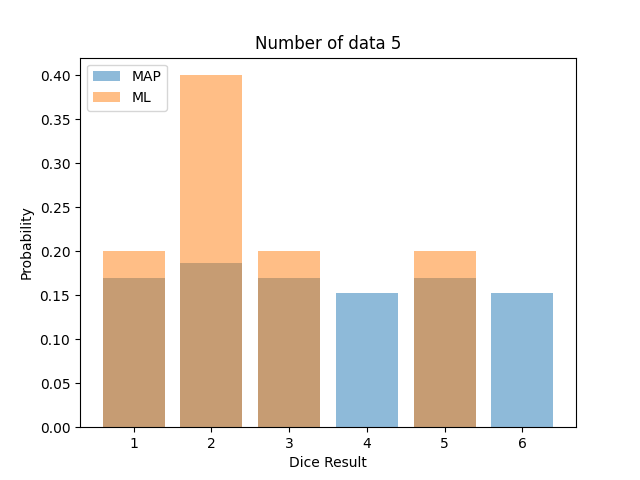

In [9]:
# TODO: visualize
%matplotlib widget
from utils import create_animation
anim = create_animation(maps, mls, stepsize=5, fps=5)

In [8]:
# TODO: describe observed effect + is die fair?

The ML estimate jumps around a lot at the start (m < 100). The MAP estimate is much smoother, and converges rather quickly to the resulting distribution. In the end, the ML and MAP estimates are still slightly different, because the MAP estimate is still biased towards uniform distribution. The die is definetely not fair.